### Importing required libraries

In [37]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import sklearn

import time

import numpy as np
from sklearn.model_selection import KFold

### Reading the input file

In [38]:

df = pd.read_csv('data/output/output.csv')
print(len(df))

83483


### Checking count of each opening

In [39]:
print(df['Opening'].value_counts())

sicilian_rossolimo        25710
GiuocoPiano               15296
Nimzowitsch-Larsen        10163
four_knights              10066
caro_kann_classic          9616
Caro-Kann2c4               4403
Kings_Gamit                4277
sicilian_dragon_other6     1752
qid4e3                     1596
Modern                      604
Name: Opening, dtype: int64


### Replacing Opening and game result with numerical values

In [40]:
df.replace({'Opening': {'sicilian_rossolimo':1, 'caro_kann_classic':2, 'sicilian_dragon_other6':3, 'four_knights':4, 'qid4e3':5,
                        'GiuocoPiano': 6,'Nimzowitsch-Larsen':7, 'Caro-Kann2c4': 9, 'Kings_Gamit':10, 'Modern':11}}, inplace=True)


df.replace({'game_result': {'draw':0, 'white':1, 'black':2}}, inplace=True)

### Decision Tree Based on Opening, WhiteElo and BlackElo

#### Splitting the data into train and test

In [41]:
def prep_training(df, first_n_moves):
    
    x = df[['WhiteElo', 'BlackElo', 'Opening']]
    y = df.iloc[:, 10]
   
    return sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [42]:
x_train, x_test, y_train, y_test = prep_training(df, 4)
print("*********")
print(x_train, x_test, y_train, y_test)

*********
       WhiteElo  BlackElo  Opening
3165     2436.0    2296.0        4
43283    2323.0    2444.0        1
31019    2274.0    2566.0        1
78551    2304.0    2108.0        7
24451    2365.0    2250.0        1
...         ...       ...      ...
65       2375.0    2445.0        4
26002    2415.0    2590.0        1
69579    2320.0    2405.0        9
63803    2450.0    2048.0        6
41769    2300.0    2184.0        1

[66786 rows x 3 columns]        WhiteElo  BlackElo  Opening
76958    2173.0    2097.0        7
50459    2267.0    2153.0       10
25087    2350.0    2270.0        1
73880    2255.0    2545.0        7
4130     2261.0    2351.0        4
...         ...       ...      ...
26003    2420.0    2460.0        1
55503    2351.0    2078.0        6
37334    2354.0    2177.0        1
63608    2690.0    2589.0        6
17317    2299.0    2355.0        2

[16697 rows x 3 columns] 3165     0
43283    0
31019    0
78551    1
24451    0
        ..
65       0
26002    0
69579    0

#### Building decision tree
##### Finding accuracy 

In [43]:
def build_decision_tree(depth, x_train,y_train, x_test, y_test):
    print("\nDepth: " +str(depth))

    #  1. create a model
    clf = DecisionTreeClassifier(max_depth =depth) #max_depth = depth

    #  2. feed training data into the model
    clf = clf.fit(x_train,y_train)

    #  3. predict values for your test data
    y_pred = clf.predict(x_test)
    
    #class_n = ['result']
    plt.figure(figsize=(12,12))  # set plot size
    class_n = ['draw', 'white', 'black']
    tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n);
    plt.show()

    #  5. find the training and testing accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Depth: 16


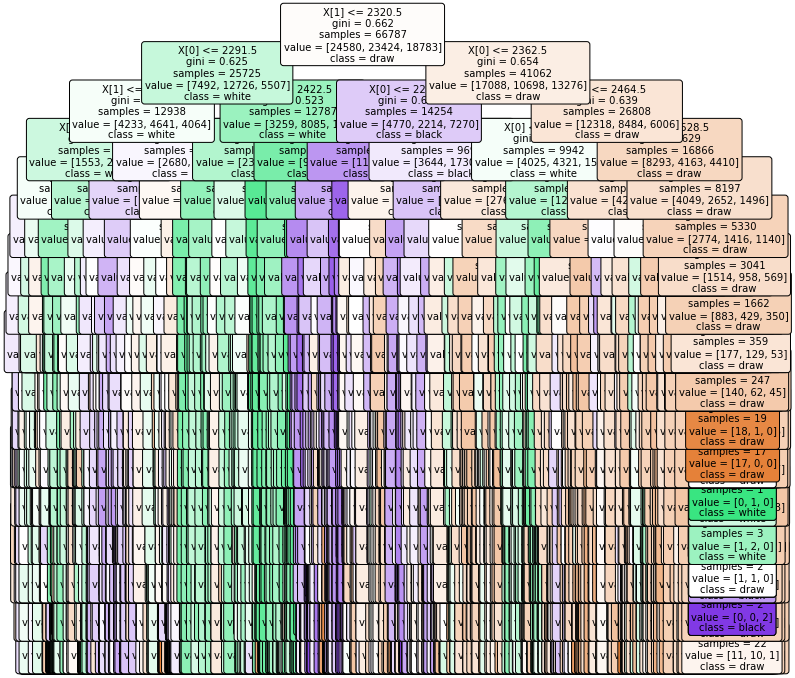

Accuracy: 0.45082654528030663

Time:
446.6504330635071


In [45]:
for depth in [16]:
    start = time.time()
    build_decision_tree(depth, x_train,y_train, x_test, y_test)
    end = time.time()
    print('\nTime:')
    print(end - start)

### Decision Tree for First "X" moves, Opening, WhiteElo, BlackElo
#### Here data is split with same type of first "X" moves and then Decision Tree is applied 

In [ ]:
for value in [10,20, 25, 30]:
    build_decision_tree_for_firstXmoves(value)

In [ ]:
def build_decision_tree_for_firstXmoves(x):
    
    print(f"\n=================================== First {x} moves ===================================")
    npData = df.to_numpy()
    firstXDict = {}

    # Getting rows as value of dictionary, where key is firstX moves

    for row in range(len(npData)):
        moves = npData[row][7] # index of moves
        movesList = moves.split()

        #firstTwo = " ".join(movesList[0:4]) # Moves 0, 1 
        firstX = " ".join(movesList[0:x*2]) 

        if firstX in firstXDict.keys():
            firstXDict[firstX].append(row)
        else:
            firstXDict[firstX] = [row]


    # Going through each key and
    for key in firstXDict.keys():

        if len(firstXDict[key]) >= 10:

            trainingIndices = firstXDict[key][0:(int)(len(firstXDict[key]) * 0.8)]
            testingIndices = firstXDict[key][len(trainingIndices):len(firstXDict[key])]

            print("_________________________________________________")
            print("Key: ", key)
            print("Key length: ",len(firstXDict[key]))


            x = df[['WhiteElo', 'BlackElo', 'Opening']]
            y = df.iloc[:, 10]

            x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
            clf = DecisionTreeClassifier(max_depth=12)
            clf.fit(x_train, y_train)

            y_pred = clf.predict(x_test)


            print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    #         plt.figure(figsize=(12,12))  # set plot size
    #         class_n = ['draw', 'white', 'black']
    #         feature_cols = ['white_elo', 'black_elo', 'opening']
    #         tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n, feature_names = feature_cols);
    #         plt.show()


### Using K-Fold cross validation to check if accuracy improves

In [ ]:
df

TRAIN: [ 8349  8350  8351 ... 83480 83481 83482] TEST: [   0    1    2 ... 8346 8347 8348]

Depth: 14


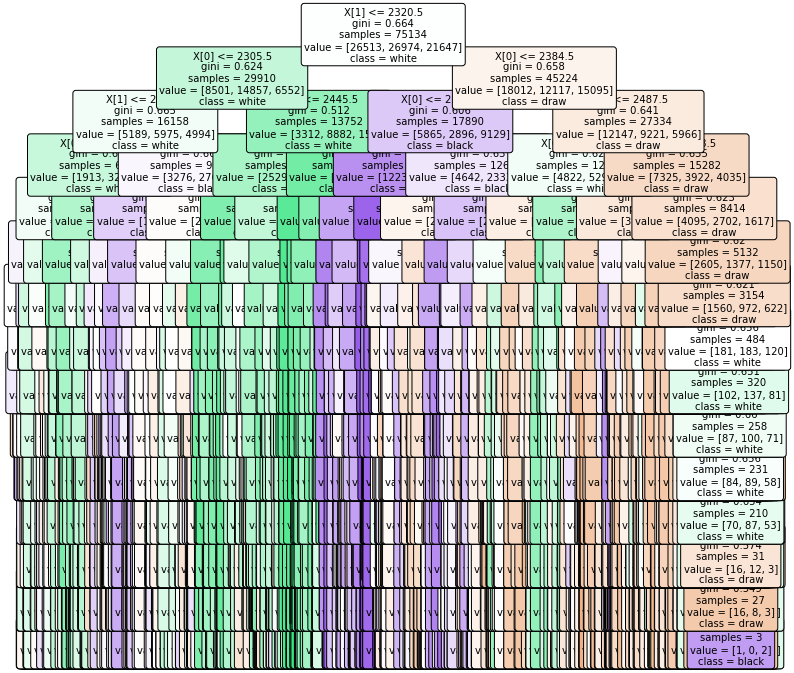

Accuracy: 0.4763444723919032
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [ 8349  8350  8351 ... 16695 16696 16697]

Depth: 14


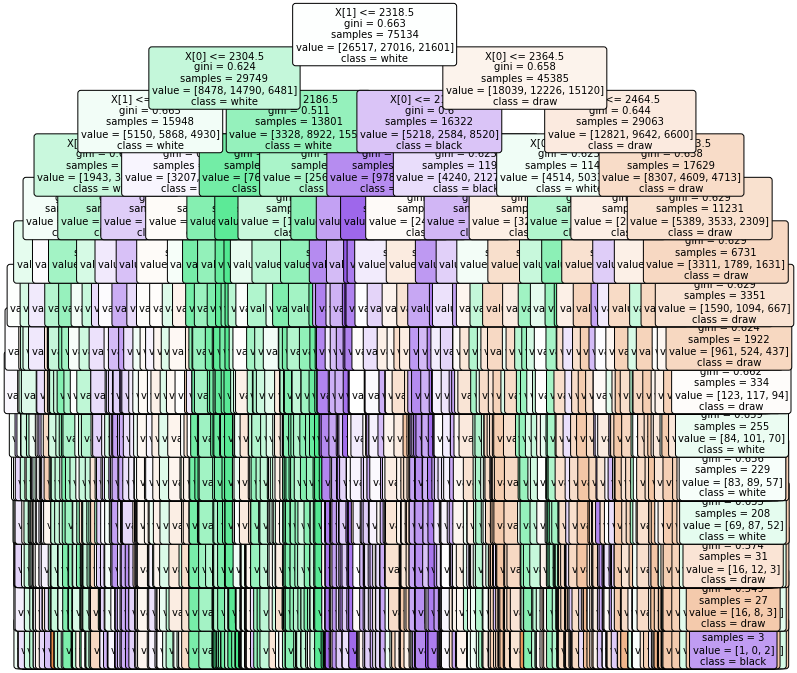

Accuracy: 0.4939513714217271
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [16698 16699 16700 ... 25044 25045 25046]

Depth: 14


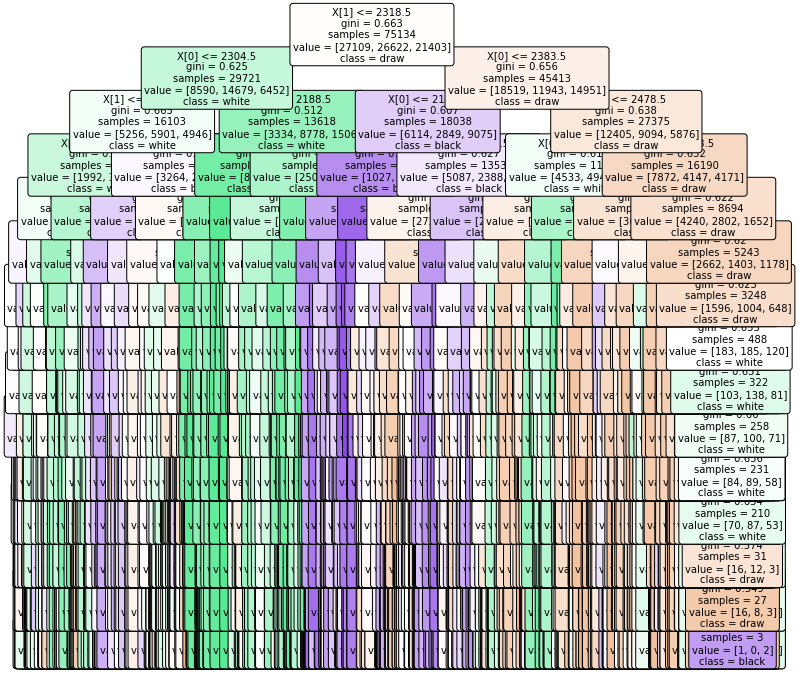

Accuracy: 0.466403162055336
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [25047 25048 25049 ... 33392 33393 33394]

Depth: 14


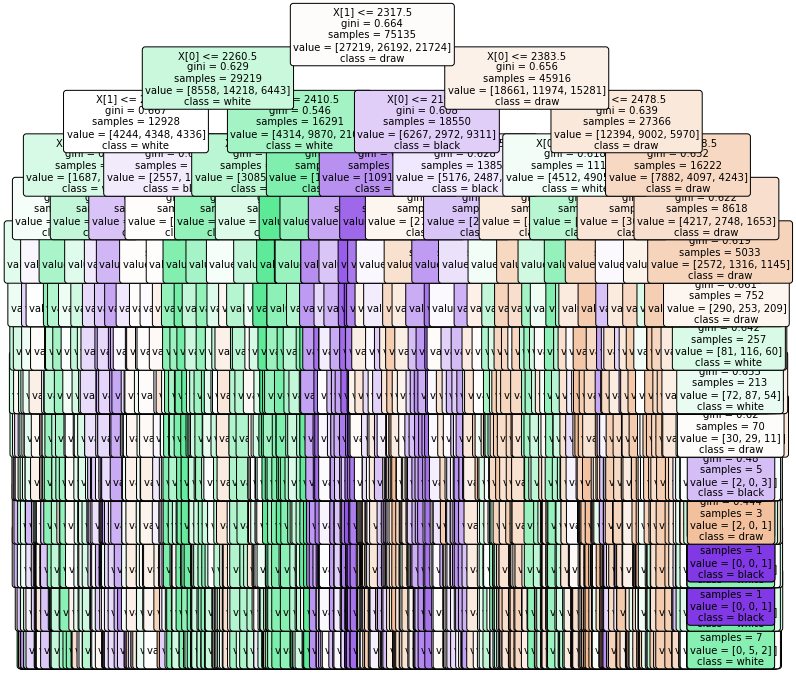

Accuracy: 0.48826066123622425
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [33395 33396 33397 ... 41740 41741 41742]

Depth: 14


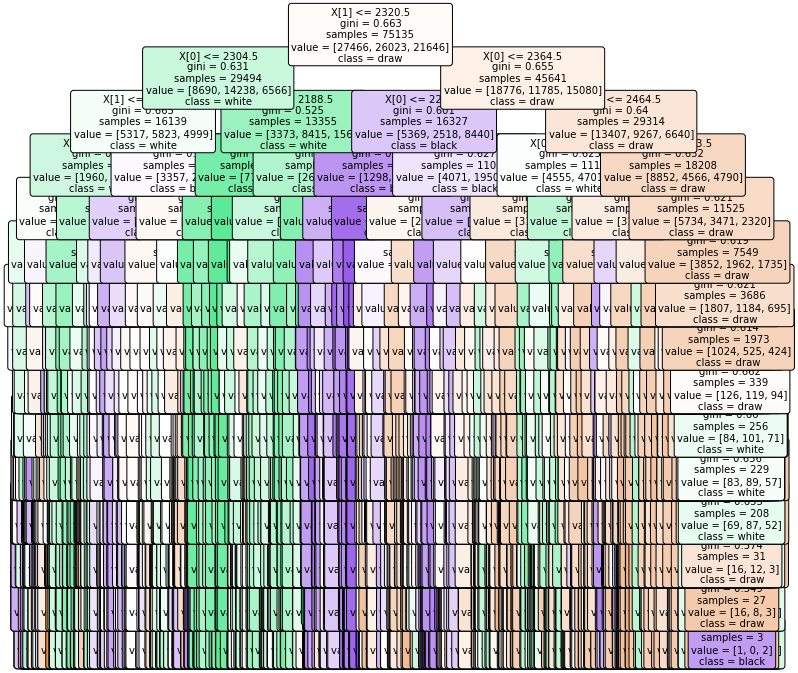

Accuracy: 0.5161715380929564
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [41743 41744 41745 ... 50088 50089 50090]

Depth: 14


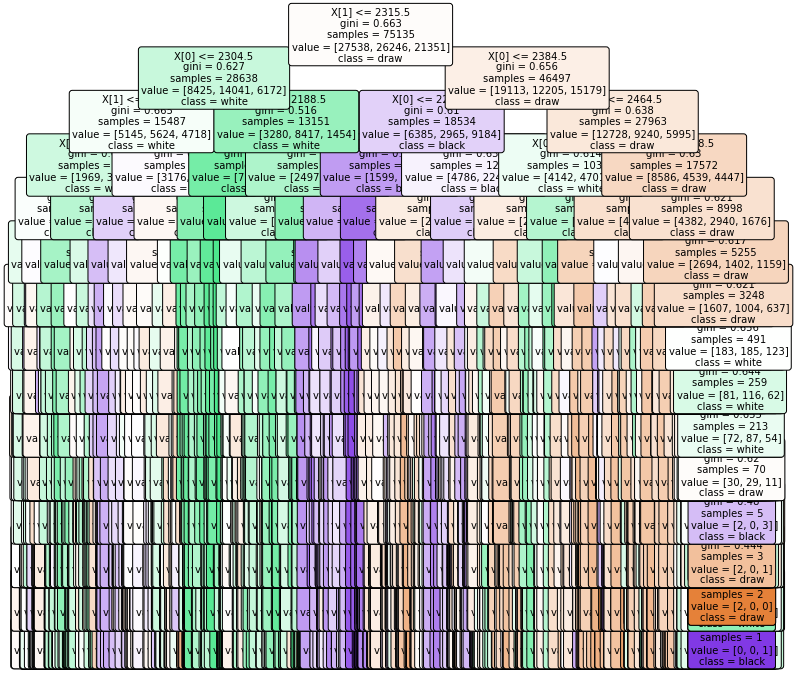

Accuracy: 0.47831816003833255
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [50091 50092 50093 ... 58436 58437 58438]

Depth: 14


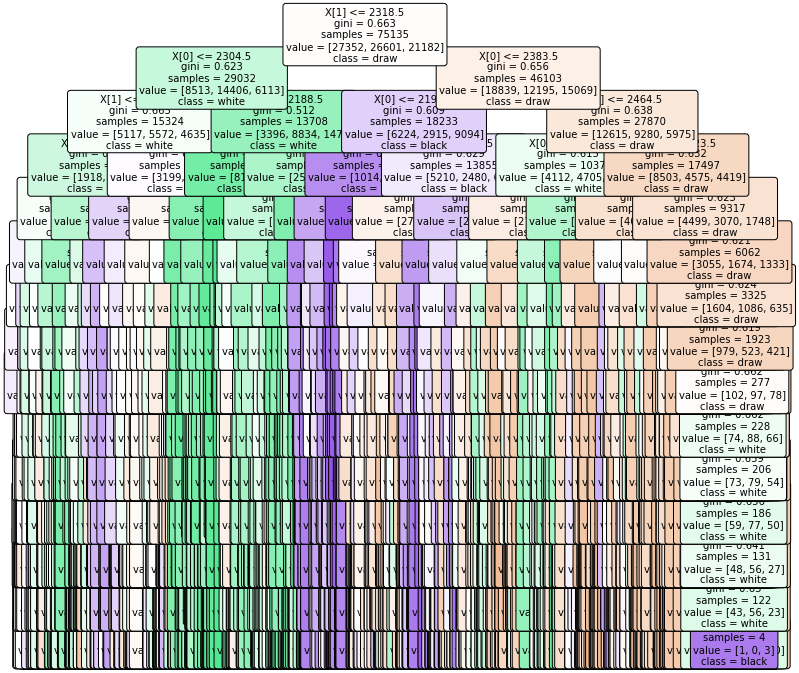

Accuracy: 0.46550071873502635
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [58439 58440 58441 ... 66784 66785 66786]

Depth: 14


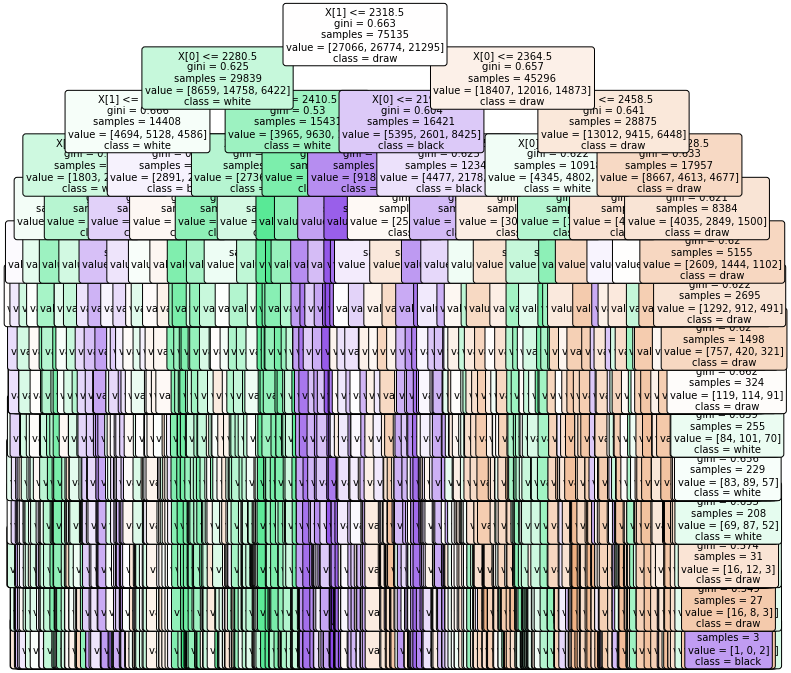

Accuracy: 0.49820316243411594
TRAIN: [    0     1     2 ... 83480 83481 83482] TEST: [66787 66788 66789 ... 75132 75133 75134]

Depth: 14


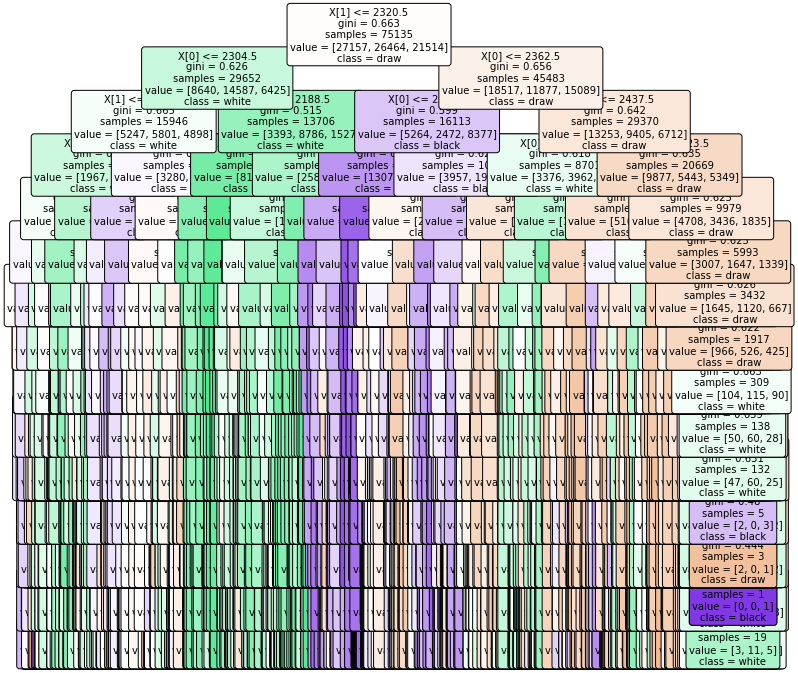

Accuracy: 0.45340201245807377
TRAIN: [    0     1     2 ... 75132 75133 75134] TEST: [75135 75136 75137 ... 83480 83481 83482]

Depth: 14


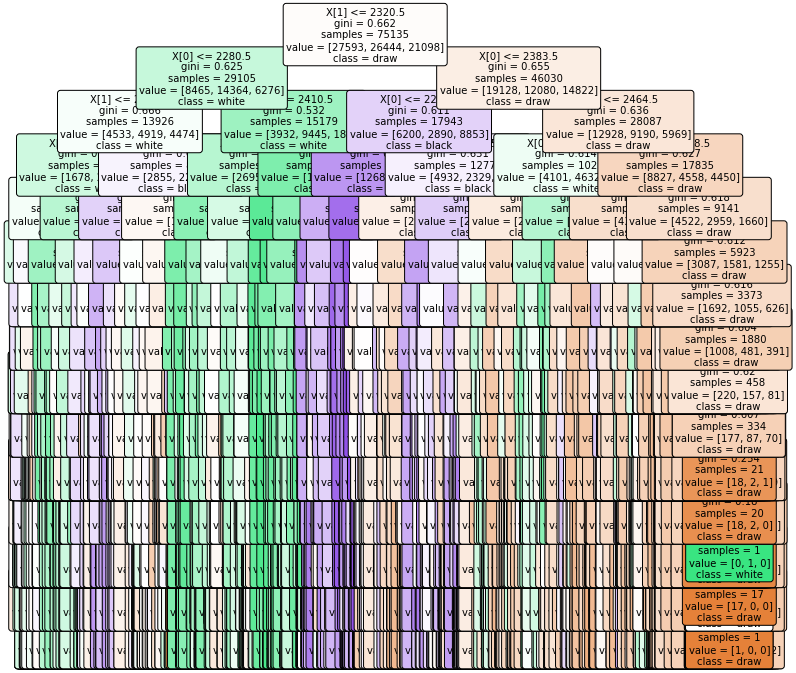

Accuracy: 0.4779587925251557


In [46]:
x = df[['WhiteElo', 'BlackElo', 'Opening']]
y = df.iloc[:, 10]

x = x.to_numpy()
y =y.to_numpy()

kf = KFold(n_splits=10, random_state=None)
#kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    build_decision_tree(14, x_train,y_train, x_test, y_test)